# Develop an optimal Decision Tree for breast.data

In [52]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# load dataset breast.data
df = pd.read_csv('./breast.data')

In [53]:
df.describe()

,id_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [54]:
print(df.shape)
print(df.info())

(699, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id_number                      699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_Cell_Size           699 non-null int64
Uniformity_Cell_Shape          699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
None


In [55]:
# Any Nulls?
df.isnull().sum()

id_number                      0
Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

- Tous les descripteurs de breast.data ont déjà le même scale (1 - 10), donc ils n'ont pas besoin du "scaling".
- Les transformations de dataframe seront effectuer sur une copie de breast_dataframe nommée "X".
- __On va dropper les colonnes de descripteurs non-pertinents: "id_number" et "classe"__

- __Aussi, on va transformer type "object" de Bare_Nuclei dans "int64"__

In [56]:
#nettoyer
df.replace('?', -99999, inplace=True)

- __Split the data into testing/training set (80/20)__

In [57]:
#creer X 
X = df.drop("Class", axis=1)
X=X.drop("id_number", axis=1)
print(X.head())
X.shape

   Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0                5                     1                      1   
1                5                     4                      4   
2                3                     1                      1   
3                6                     8                      8   
4                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3                1        1  
3                3

(699, 9)

In [58]:
#description
X.describe()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [59]:
#créer y
y =df["Class"]
print(y.head())
y.shape

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64


(699,)

In [60]:
from sklearn.model_selection import train_test_split
#Faire un split train-test
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2, random_state=44)

In [61]:
#créer le modele
classifier = DecisionTreeClassifier(criterion="entropy", random_state=44, max_depth=6, min_samples_leaf=5) 

In [62]:
# train modele
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=44,
            splitter='best')

In [63]:
y_pred = classifier.predict(X_test)
print(y_pred.shape)

accuracy = classifier.score(X_test, y_test)
print("Accuracy of the model predicted by the test: " + str(accuracy))

(140,)
Accuracy of the model predicted by the test: 0.9428571428571428


- __Le précision (accuracy) a été plus haut avec l'algorithme kNN (0.9928571428571429)__

## Pour les données suivantes ([4,2,1,1,1,2,3,2,1]) prédire la cible

In [64]:
a = [[4,2,1,1,1,2,3,2,1], ]
y_pred = classifier.predict(a)
print(y_pred)

[2]


- __La prédiction est Classe 2.__

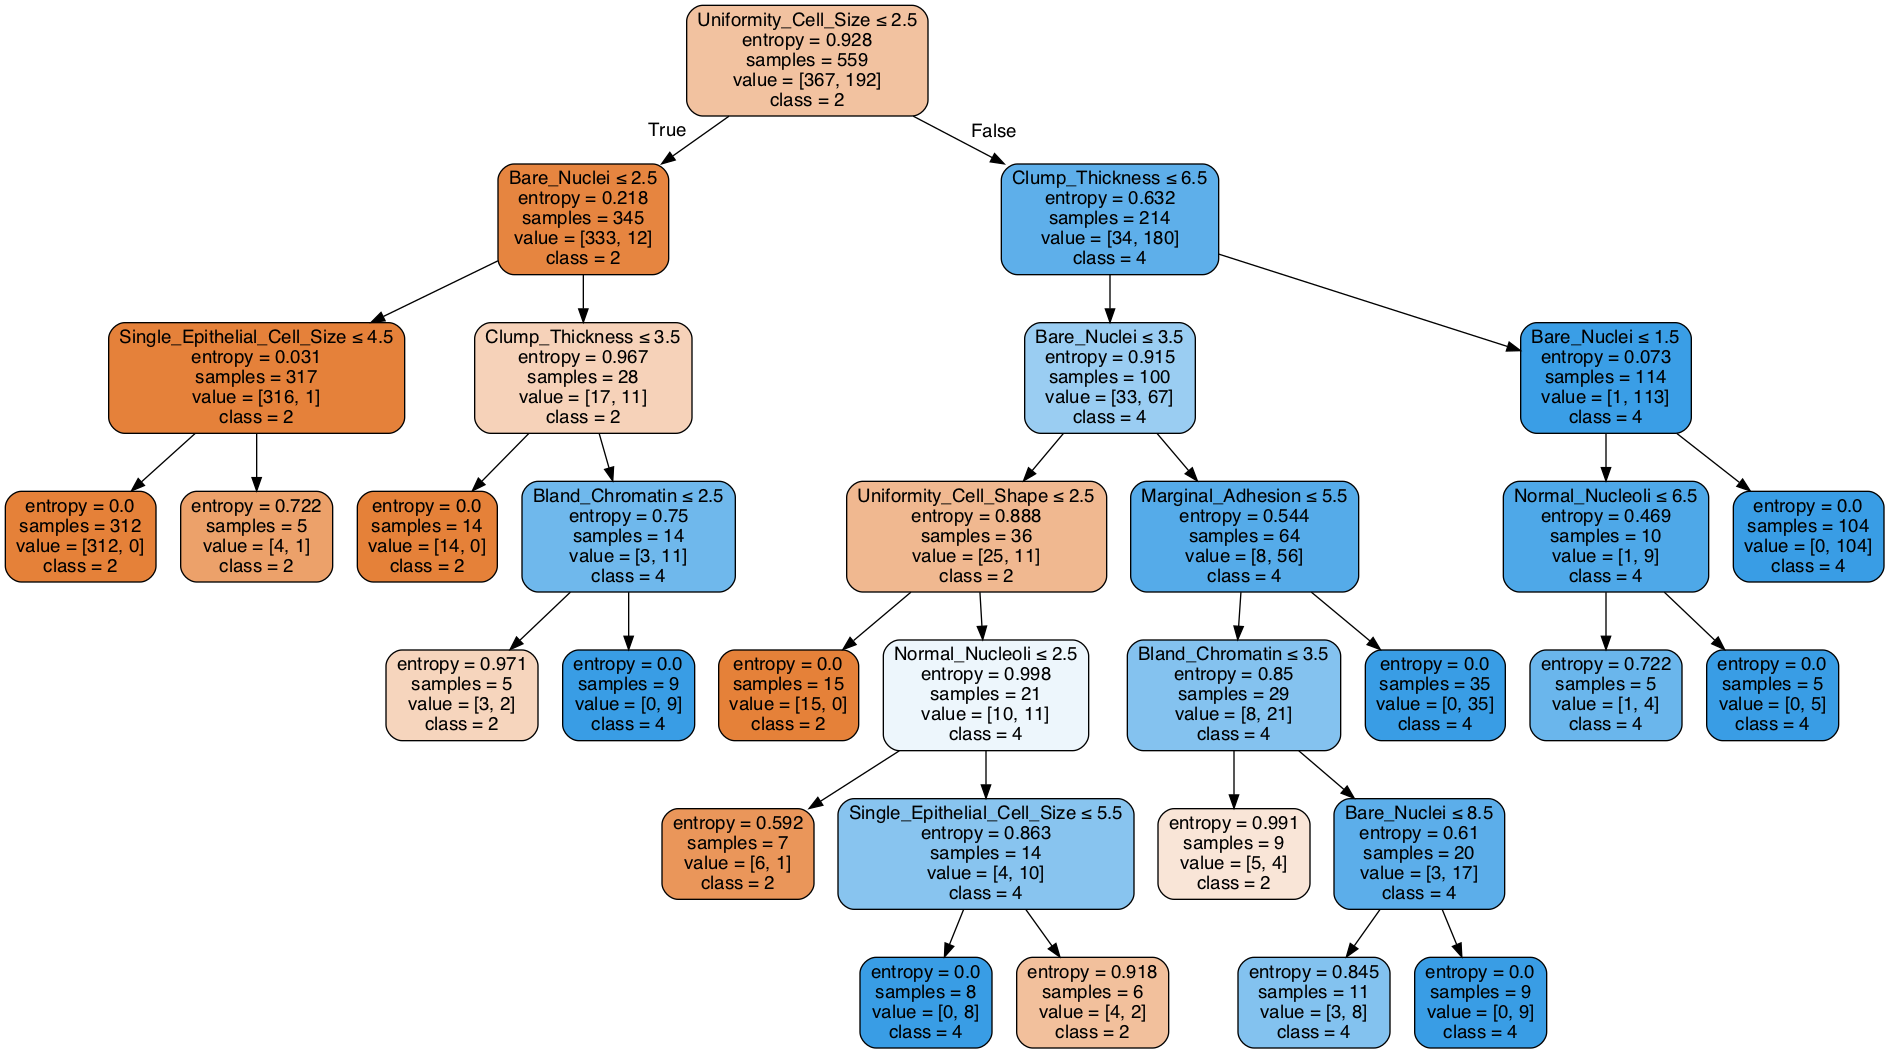

In [65]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import os     

# os.environ["PATH"] += os.pathsep + '~/Jupyter-Notebooks\\Local\\conda\\conda\\pkgs\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz'

dot_data = StringIO()
feature_cols = ["Clump_Thickness","Uniformity_Cell_Size","Uniformity_Cell_Shape","Marginal_Adhesion",
                "Single_Epithelial_Cell_Size","Bare_Nuclei","Bland_Chromatin","Normal_Nucleoli","Mitoses"]
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['2','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('student.png')
Image(graph.create_png())